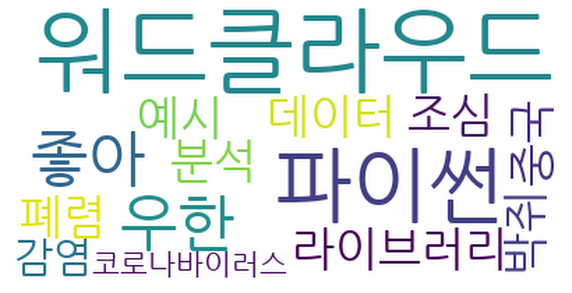

In [3]:
# basic crawler - keyword를 입력하면 해당 keyword의 네이버뉴스 top-N개 기사를 크롤링 및 워드클라우드 시각화

import requests
from bs4 import BeautifulSoup
import openpyxl
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한국어 코랩 설정
# 1) google_colab에서 한국어 설정 (코랩에서 깔면 됨)
# 2) local pc에서 한국어 설정 (nanum명조, 나눔고딕체를 다운받고 -> )

path_gothic = 'C:/Windows/Fonts/NanumMyeongjoExtraBold.ttf'
fontprop1 = fm.FontProperties(fname=path_gothic).get_name()
plt.rcParams["font.family"] = fontprop1

# 한국어 텍스트 -> 워드클라우드
text = "파이썬 워드클라우드 파이썬 좋아 워드클라우드 파이썬 라이브러리 좋아 파이썬 워드클라우드 예시 워드클라우드 우한 폐렴 조심 데이터 분석 우한 워드클라우드 중국 박쥐 감염 코로나바이러스"

stop_words = set(STOPWORDS)
stop_words.add('워드클라우드')
wordcloud = WordCloud(font_path='font/NanumGothic.ttf', background_color='white').generate(text)

plt.figure(figsize=(10,10)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show()

In [7]:
# web crawling 하는 코드

import requests
from bs4 import BeautifulSoup

# 반복1: 기사번호를 변경시키면서 데이터 수집을 반복하기
# 1 ~ 100까지 10단위로 반복(1, 11, ..., 91)
keyword = "머신러닝"
mylist = []


# 1) web page url 요청 requests.get 하는 부분
# 2) html을 가져오고
# 3) html에서 일부만 가져오고 (class))
# 4) html의 일부 중에서도 딱 원하는 그 정보 (class)

for n in range(1, 100, 10):
   raw = requests.get("https://search.naver.com/search.naver?&where=news&query=" + keyword + "&start=" + str(n), headers={'User-Agent':'Mozilla/5.0'})

   html = BeautifulSoup(raw.text, "html.parser")
       
   articles = html.select("ul.list_news > li")
   
   # 반복2: 기사에 대해서 반복하면 세부 정보 수집하기                
   # 리스트를 사용한 반복문으로 모든 기사에 대해서 제목/언론사 출력
   for ar in articles:
       title = ar.select_one("a.news_tit").text
       source = ar.select_one("a.info.press").text
       mylist.append([title, source])            
       print(title, source)
df = pd.DataFrame(mylist)

SAS, 가트너 MQ '데이터 사이언스·머신러닝 플랫폼' 부문 8년 연속 리더 데이터넷
레브웨어, 머신러닝 개발·운영 도구 'Lev.AI' 개발 파이낸셜뉴스
[人사이트]안병환 플라이셔 CTO "데이터 머신러닝으로 게임서비스 확대" 전자신문
라온피플, AI 미디어 솔루션 출시... 딥러닝 기술로 영상 촬영 및 전송 인공지능신문
오라클자바교육센터, 기계학습 머신러닝 재직자 교육 실시 뉴스투데이
AI 머신러닝 원리와 코딩 재밌게 교육 한국일보
라온피플, 딥러닝 비전검사 나비 AI 4.0 선봬 IT조선
부산銀, 머신러닝으로 맞춤형 대출 추천 'ONE신용대출' 전자신문
SAS, 가트너 '데이터 사이언스 및 머신러닝 플랫폼' 부문 리더 8년 연속 선정 인공지능신문
마크비전, 소셜미디어로 머신러닝 위조상품 모니터링 확장 테크월드
[클라우드 성공전략 콘퍼런스]박동철 메가존클라우드 매니저 "머신러닝 통해 ... 전자신문
한국플랫폼서비스기술, 'AI EXPO KOREA 2021'에서 쿼리기반 딥러닝 기계학습 ... 인공지능신문
인공 신경망의 첫 구현체이자 현대 딥 러닝의 시초, 퍼셉트론 한경비즈니스언론사 선정
매스웍스, 가트너 MQ 데이터 과학·머신러닝 플랫폼 부문 리더 선정 데이터넷
집콕 특수… 안마의자·러닝머신 불티 디지털타임스
분당서울대병원, AI 머신러닝으로 뱃살 이용한 유방재건수술 합병증 고위험 요... 인공지능신문
라온피플, 딥러닝 비전검사 나비 AI 4.0 선봬 IT조선
"AI 메타버스 타임머신 타고 역사 속 인물 만난다" (下) AI타임스
웰스, 하반기 러닝머신 등 헬스케어 용품 렌털…"코로나 홈트족 공략" 뉴스1
위세아이텍, 'AI EXPO KOREA 2021' 참가... 머신러닝자동화 플랫폼 선봬 인공지능신문
누베베한의원, 머신러닝 활용 체중감량 예측 시스템 특허 취득 민족의학신문
효성인포메이션, AI·머신러닝 전용 파일 스토리지 출시 디지털타임스
아이오닉5에 꽂고 야외서 러닝머신…수아레즈가 뛰어봤다[영상] 중앙일보언론사 선정
러닝머신 '시속 30km'로 여유

In [9]:
df.to_csv("상위백개_{}.csv".format(keyword))

In [10]:
df

,0,1
0,"SAS, 가트너 MQ '데이터 사이언스·머신러닝 플랫폼' 부문 8년 연속 리더",데이터넷
1,"레브웨어, 머신러닝 개발·운영 도구 'Lev.AI' 개발",파이낸셜뉴스
2,"[人사이트]안병환 플라이셔 CTO ""데이터 머신러닝으로 게임서비스 확대""",전자신문
3,"라온피플, AI 미디어 솔루션 출시... 딥러닝 기술로 영상 촬영 및 전송",인공지능신문
4,"오라클자바교육센터, 기계학습 머신러닝 재직자 교육 실시",뉴스투데이
...,...,...
95,"팔로알토네트웍스, 머신러닝 기반 방화벽 내놨다",아이뉴스24
96,"[AWS 리인벤트 2020] AWS, 머신러닝 기반 완전 관리형 운영서비스 출시",디지털데일리
97,"서비스나우, 나우플랫폼 새로운 버전... 강력한 머신러닝 AI 솔루션으로 디지...",인공지능신문
98,[누구나 개발자 #1] ③Azure에서 머신러닝을 한다는 것,IT조선


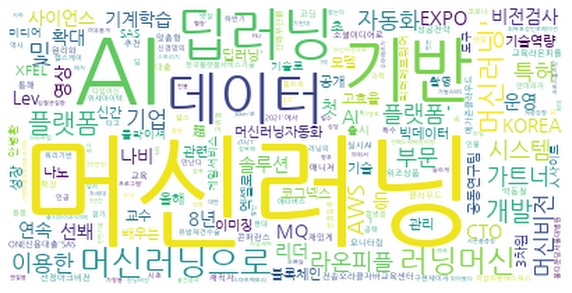

In [11]:
stop_words = []
wordcloud = WordCloud(stopwords=stop_words, font_path='font/NanumGothic.ttf', background_color='white').generate(''.join(list(df[0])))

plt.figure(figsize=(10,10)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show()
#plt.savefig()